In [60]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris_df = pd.read_csv('Iris.csv', index_col=0)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [62]:
# Check for missing values in the dataset
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
# Display unique values in 'Species' column to understand its distribution
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [64]:
# Independent variables (features)
X = iris_df.drop(['Species'], axis=1)

# Dependent variable (target)
y = iris_df['Species']

In [65]:
# Encode the target variable
y = y.apply(lambda x: 0 if x == 'Iris-setosa' else 1)

# Verify the encoding
y.value_counts()

Species
1    100
0     50
Name: count, dtype: int64

In [66]:
X.shape, y.shape

((150, 4), (150,))

In [67]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Initialise the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Make predictions on the test data
y_pred = model.predict(X_test).reshape(-1,1)
y_pred

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int64)

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0],
       [ 0, 20]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (without normalisation)')

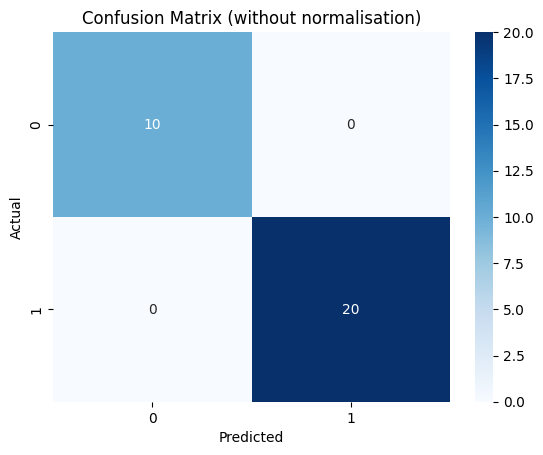

In [71]:
# Heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot= True, fmt= 'd', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (without normalisation)')

From the confusion matrix it can be interpreted that the model has achieved perfect precision and recall because there are no false positives or false negatives. Therefore it can be predictied that precision and recall will both be 1.0(100%).

In [72]:
# Calculating the Accuracy, Precision, Recall and F1 score
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = (TP + TN)/(TP + FN + TN + FP)
print(f"The accuracy score of the model is {accuracy_score}.")

precision_score = TP / (TP + FP)
print(f"The precision score of the model is {precision_score}.")

recall_score = TP / (TP + FN)
print(f"The recall score of the model is {recall_score}.")

f1_score = 2 * ((precision_score * recall_score)/(precision_score + recall_score))
print(f"The F1 score of the model is {f1_score}.")

The accuracy score of the model is 1.0.
The precision score of the model is 1.0.
The recall score of the model is 1.0.
The F1 score of the model is 1.0.


In [73]:
# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

classes = list(iris_df['Species'])
conf_mat = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

Confusion Matrix:
 [[10  0]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The confusion matrix and classification report indicate that all instances of class 0 ('Iris-setosa') were correctly classified as class 0 and not as class 1 ('Iris-versicolour' or 'Iris-virginica'). Class 1 were also correctly classified  in all instances.

The overall accuracy of the model is 1.0, meaning that 100% of the instances were correctly classified.